# Assignment 2


## Question 1

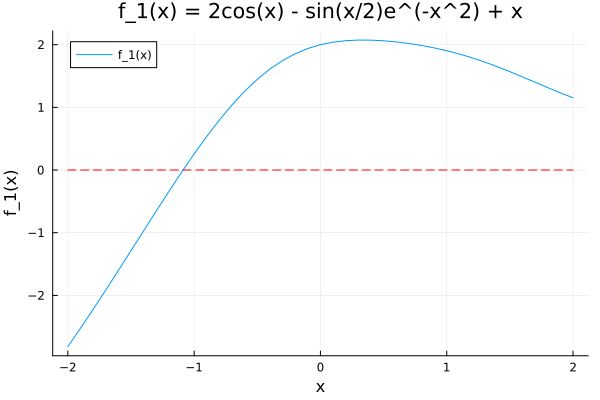

In [2]:
f_1(a) = 2*cos(a) - sin(a/2)*exp(-a^2) + a

x_range = -2:0.1:2
y_range = f_1.(x_range)
using Plots
plot(x_range, y_range, label="f_1(x)", xlabel="x", ylabel="f_1(x)", title="f_1(x) = 2cos(x) - sin(x/2)e^(-x^2) + x")
plot!(x_range, zeros(length(x_range)), label="", color=:red, linestyle=:dash)


In [3]:
function bisection(func, a, b, fa, fb, atol, ftol)
    # Check input
    if (a >= b) || (fa * fb >= 0) || (atol <= 0)
        println("Something wrong with the input: quitting")
        return NaN, NaN, []
    end
    
    # Maximum iterations
    kmax = ceil(Int, log2((b - a) / 2) - log2(atol))
    xk = zeros(kmax)
    
    # Bisection algorithm
    for k in 1:kmax
        p = (a + b) / 2
        xk[k] = p
        fp = func(p)
        
        if abs(fp) < ftol
            return p, k, xk[1:k]
        end
        
        if fa * fp < 0
            b = p
        else
            a = p
            fa = fp
        end
    end
    
    p = (a + b) / 2
    return p, kmax, xk
end


bisection (generic function with 1 method)

In [4]:
using Printf;

x, k, xk = bisection(f_1, -5, 0, f_1(-5), f_1(0), 1e-6, 1e-16)
println("Root: $x")
for i in 1:k
    @printf("%d\t%.16f\tf(x)=%.6f\n", i, xk[i], f_1(xk[i]))
end

Root: -1.0876506567001343
1	-2.5000000000000000	f(x)=-4.100455
2	-1.2500000000000000	f(x)=-0.496712
3	-0.6250000000000000	f(x)=1.204950
4	-0.9375000000000000	f(x)=0.433702
5	-1.0937500000000000	f(x)=-0.018226
6	-1.0156250000000000	f(x)=0.211894
7	-1.0546875000000000	f(x)=0.097767
8	-1.0742187500000000	f(x)=0.039990
9	-1.0839843750000000	f(x)=0.010936
10	-1.0888671875000000	f(x)=-0.003632
11	-1.0864257812500000	f(x)=0.003655
12	-1.0876464843750000	f(x)=0.000012
13	-1.0882568359375000	f(x)=-0.001810
14	-1.0879516601562500	f(x)=-0.000899
15	-1.0877990722656250	f(x)=-0.000443
16	-1.0877227783203125	f(x)=-0.000215
17	-1.0876846313476562	f(x)=-0.000102
18	-1.0876655578613281	f(x)=-0.000045
19	-1.0876560211181641	f(x)=-0.000016
20	-1.0876512527465820	f(x)=-0.000002
21	-1.0876488685607910	f(x)=0.000005
22	-1.0876500606536865	f(x)=0.000002


In [13]:
function secant(f,x0,x1,tol)
    f0=f(x0)
    f1=f(x1)
    x_new=0
    i=0
    while (abs(x0-x1)>tol)
        i=i+1
        println("iteration:",i)
        x_new=x1-((f1*(x1-x0))/(f1-f0))
        x0=x1
        x1=x_new
        f0=f1
        f1=f(x1)
        @printf("x_new=%.16f\tf(x_new)=%.16f\n", x_new, f_1(x_new))
    end
    return x_new
end


secant (generic function with 1 method)

In [15]:

x = secant(f_1, -5, 0, 1e-6)
@printf("x=%.16f\tf(x)=%.16f\n", x, f_1(x))


iteration:1
x_new=-1.5545630740055130	f(x_new)=-1.4595250821146206
iteration:2
x_new=-0.8987147293959161	f(x_new)=0.5402054760121637
iteration:3
x_new=-1.0758850315407686	f(x_new)=0.0350405736174366
iteration:4
x_new=-1.0881743829697783	f(x_new)=-0.0015634984284705
iteration:5
x_new=-1.0876494582668086	f(x_new)=0.0000034556575630
iteration:6
x_new=-1.0876506159012511	f(x_new)=0.0000000003351146
iteration:7
x_new=-1.0876506160135244	f(x_new)=-0.0000000000000002
x=-1.0876506160135244	f(x)=-0.0000000000000002


In [ ]:
function steffensens_method(f, x0, tol)
    function g(x)
        f_x = f(x)
        return (f(x+f_x) - f_x)/f_x
    end
    calc_x(x_old) = x_old - f(x_old)/g(x_old)
    k = 1
    x_old = x0
    x_new = calc_x(x_old)
    while (abs(x_new-x_old)>tol)
        temp = calc_x(x_old)
        x_old = x_new
        x_new = temp
        printf("x_%d = %.16f\t f(x) = %.16f\n", k, x_new, f(x_new))